In [ ]:
'''
Unsupervised learning, a fundamental type of machine learning, continues to evolve. 
This approach, which focuses on input vectors without corresponding target values, 
has seen remarkable developments in its ability to group and interpret information 
based on similarities, patterns, and differences. 
Supervised vs Unsupervised Learning 
'''

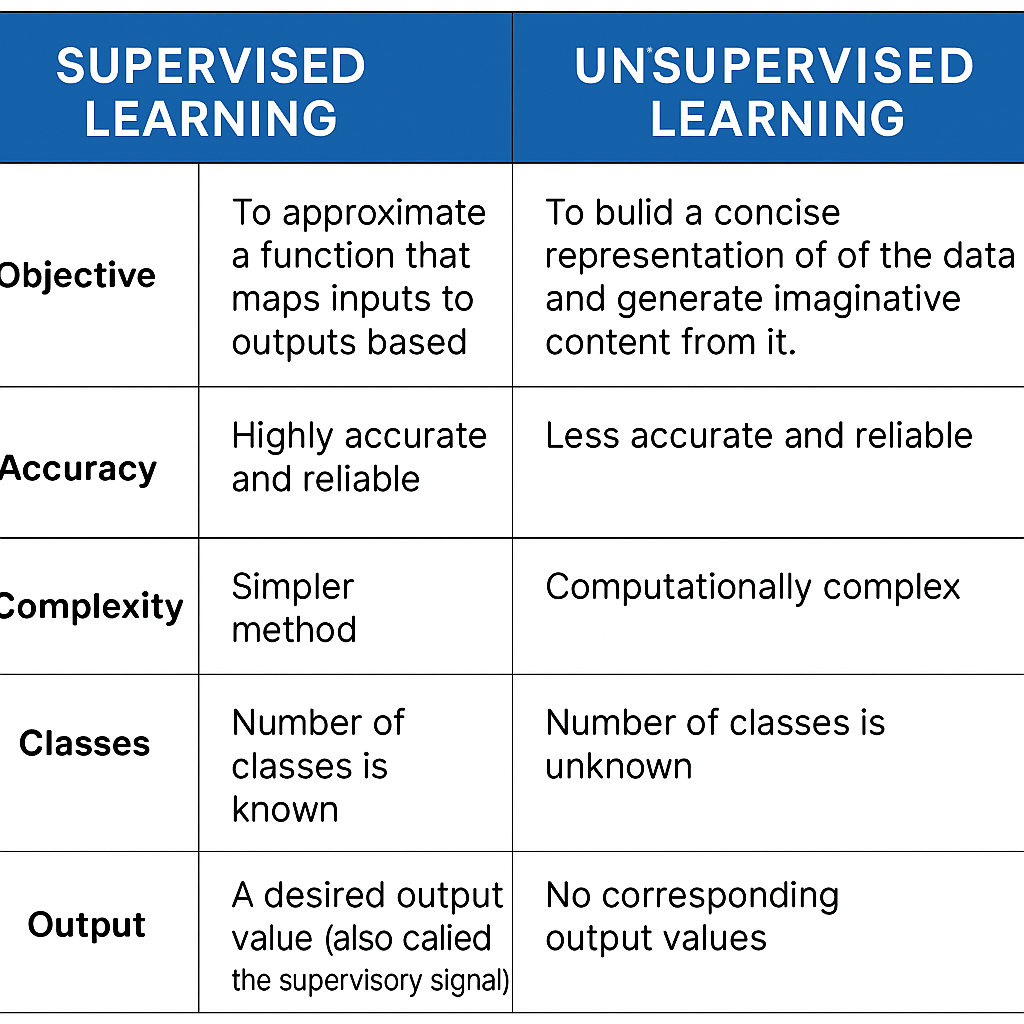

In [ ]:
#Types of Unsupervised Learning
'''
unsupervised learning can be broken down into three main tasks: 

Clustering
Association rules
Dimensionality reduction.  
'''

In [ ]:
'''
Clustering
From a theoretical standpoint, instances within the same group tend to have similar properties. 
We can observe this phenomenon in the periodic table. Members of the same group, separated by 
eighteen columns, have the same number of electrons in the outermost shells of their atoms and 
form bonds of the same type. 

This is the idea that’s at play in clustering algorithms; Clustering methods involve grouping 
untagged data based on their similarities and differences. When two instances appear in different groups,
we can infer they have dissimilar properties. 

Clustering is a popular type of unsupervised learning approach. You can even break it down further into 
different types of clustering; for example: 

- Exlcusive clustering: Data is grouped such that a single data point exclusively belongs to one cluster. 
- Overlapping clustering: A soft cluster in which a single data point may belong to multiple clusters with varying degrees of membership. 
- Hierarchical clustering: A type of clustering in which groups are created such that similar instances are within the same group and different objects are in other groups. 
- Probalistic clustering: Clusters are created using probability distribution.

'''

In [ ]:
'''
This type of unsupervised machine learning takes a rule-based approach to discovering interesting 
relationships between features in a given dataset. It works by using a measure of interest to identify 
strong rules found within a dataset. 
#Association rule
We typically see association rule mining used for market basket analysis: this is a data mining 
technique retailers use to gain a better understanding of customer purchasing patterns based on 
the relationships between various products. 

The most widely used algorithm for association rule learning is the Apriori algorithm. However, 
other algorithms are used for this type of unsupervised learning, such as the Eclat and FP-growth 
algorithms. 
'''

In [ ]:
'''
Dimensionality Reduction
Popular algorithms used for dimensionality reduction include principal component analysis (PCA) 
and Singular Value Decomposition (SVD). These algorithms seek to transform data 
from high-dimensional spaces to low-dimensional spaces without compromising meaningful properties 
in the original data. These techniques are typically deployed during exploratory data analysis (EDA)
or data processing to prepare the data for modeling.

It’s helpful to reduce the dimensionality of a dataset during EDA to help visualize data: this is 
because visualizing data in more than three dimensions is difficult. From a data processing perspective,
reducing the dimensionality of the data simplifies the modeling problem.

When more input features are being fed into the model, the model must learn a more complex approximation 
function. This phenomenon can be summed up by a saying called the “curse of dimensionality.” 

'''

In [ ]:
'''
Unsupervised Learning Applications
common use cases in the real-world include: 

- Natural language processing (NLP). Google News is known to leverage unsupervised learning to categorize 
articles based on the same story from various news outlets. For instance, the results of the football 
transfer window can all be categorized under football.
- Image and video analysis. Visual Perception tasks such as object recognition leverage unsupervised 
learning.
- Anomaly detection. Unsupervised learning is used to identify data points, events, and/or observations 
that deviate from a dataset's normal behavior.
- Customer segmentation. Interesting buyer persona profiles can be created using unsupervised learning. 
This helps businesses to understand their customers' common traits and purchasing habits, thus, enabling 
them to align their products more accordingly.
- Recommendation Engines. Past purchase behavior coupled with unsupervised learning can be used to help 
businesses discover data trends that they could use to develop effective cross-selling strategies.
'''

In [1]:
#Example
'''
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into 
K distinct, non-overlapping subgroups, or clusters, where each data point belongs to the cluster 
with the nearest mean (centroid). The "K" represents the pre-defined number of clusters to be formed.
'''
#Clustering using K-Means (Iris Dataset)
#Use Case: Group similar flowers based on petal/sepal measurements.
#Import Libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [3]:
# Load dataset
iris = load_iris()
X = iris.data

In [4]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

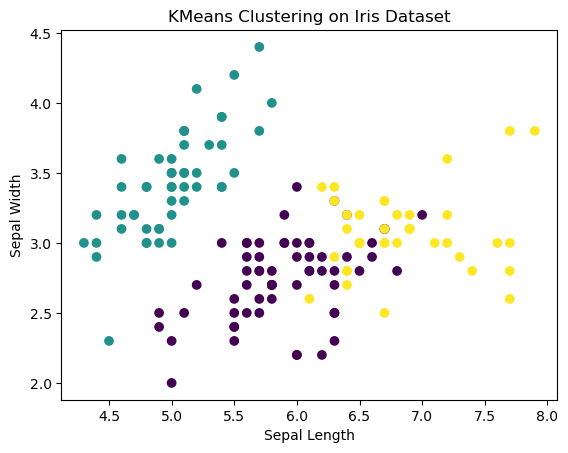

In [5]:
# Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [6]:
#K-Means Clustering another example
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

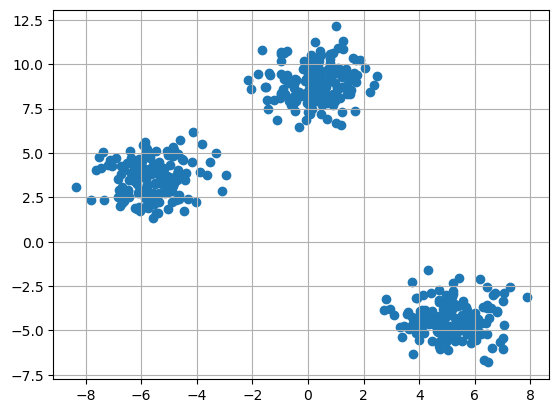

In [7]:
#Create custom dataset with make_blobs and plot it 
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [16]:
#Another example
# Initializing random centroids
'''
The code initializes three clusters for K-means clustering. It sets a random seed and generates random 
cluster centers within a specified range and creates an empty list of points for each cluster.
'''
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

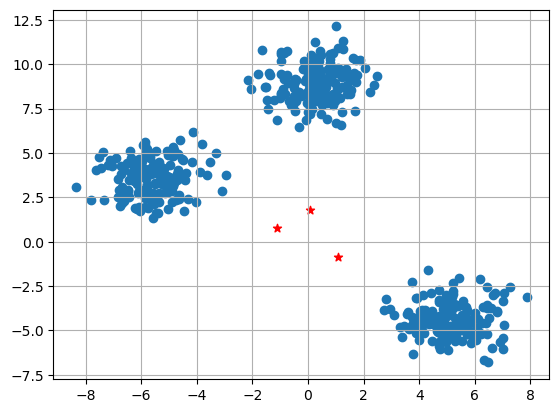

In [10]:
#Plotting random initialize center with data points
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [11]:
#Euclidean Distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [12]:
'''
Creating function Assign and Update the cluster center
This step assigns data points to the nearest cluster center and the M-step updates cluster centers 
based on the mean of assigned points in K-means clustering.
'''
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [13]:
#Creating function to Predict the cluster for the datapoints
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [14]:
#Assign, Update and predict the cluster center
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

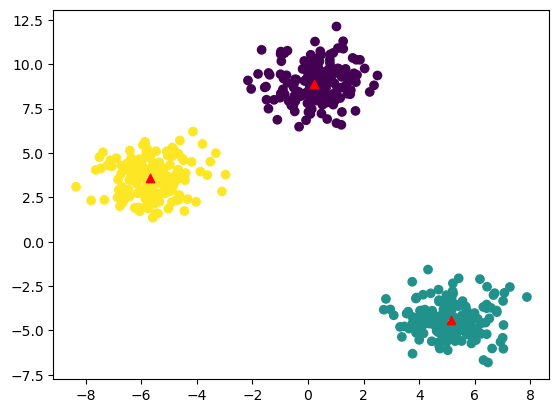

In [15]:
#Plotting data points with their predicted cluster center
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

In [ ]:
#The plot shows data points colored by their predicted clusters. 
#The red markers represent the updated cluster centers after the E-M steps 
#in the K-means clustering algorithm.

In [17]:
'''
Let's use a customer segmentation example based on a synthetic shopping dataset. 
We’ll simulate customer data with features like:

- Annual Income

- Spending Score

We’ll apply K-Means clustering to group customers based on their behavior.
'''

"\nLet's use a customer segmentation example based on a synthetic shopping dataset. \nWe’ll simulate customer data with features like:\n\n- Annual Income\n\n- Spending Score\n\nWe’ll apply K-Means clustering to group customers based on their behavior.\n"

In [18]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
# Create synthetic shopping data
data = {
    'CustomerID': range(1, 11),
    'Annual Income (k$)': [15, 16, 17, 25, 30, 45, 60, 70, 80, 90],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 60, 30, 20, 85, 50]
}
df = pd.DataFrame(data)
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,16,81
2,3,17,6
3,4,25,77
4,5,30,40
5,6,45,60
6,7,60,30
7,8,70,20
8,9,80,85
9,10,90,50


In [21]:
# Use only features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,16,81
2,17,6
3,25,77
4,30,40
5,45,60
6,60,30
7,70,20
8,80,85
9,90,50


In [22]:
# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


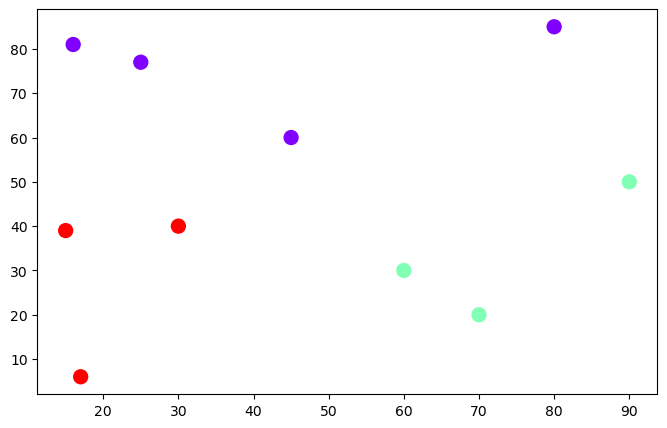

In [24]:
# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow', s=100)

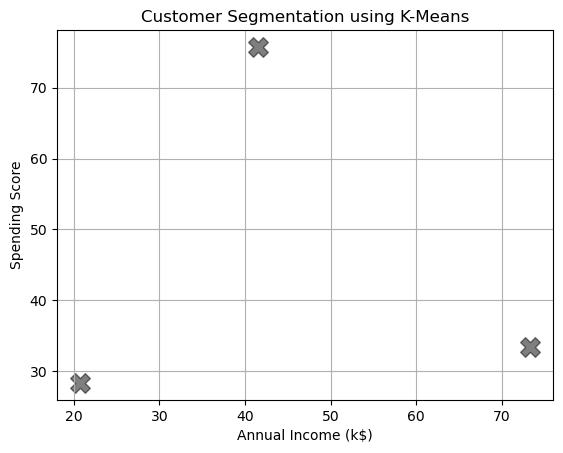

In [27]:
# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5, marker='X')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()

In [28]:
#K-Means Example: Financial Stock Risk Segmentation
'''
We will use historical stock price data to:

Calculate volatility and average returns for a set of stocks

Apply K-Means to cluster the stocks into risk categories: low, medium, high
'''

'\nWe will use historical stock price data to:\n\nCalculate volatility and average returns for a set of stocks\n\nApply K-Means to cluster the stocks into risk categories: low, medium, high\n'

In [30]:
#Install yfinance  to stock price
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/c9/1e/631c80e0f97aef46eb73549b9b0f60d94057294e040740f4cad0cb1f48e4/yfinance-0.2.65-py2.py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----- -------------------------------- 143.4/949.2 kB 8.3 MB/s eta 0:00:01
     ---------------------- --------------- 563.2/949.2 kB 8.8 MB/s eta 0:00:01
     ------------------------------ ------- 757.8/949.2 kB 8.0 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 8.6 MB/s eta 0:00:00
  Insta

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [40]:
!pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/109.5 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


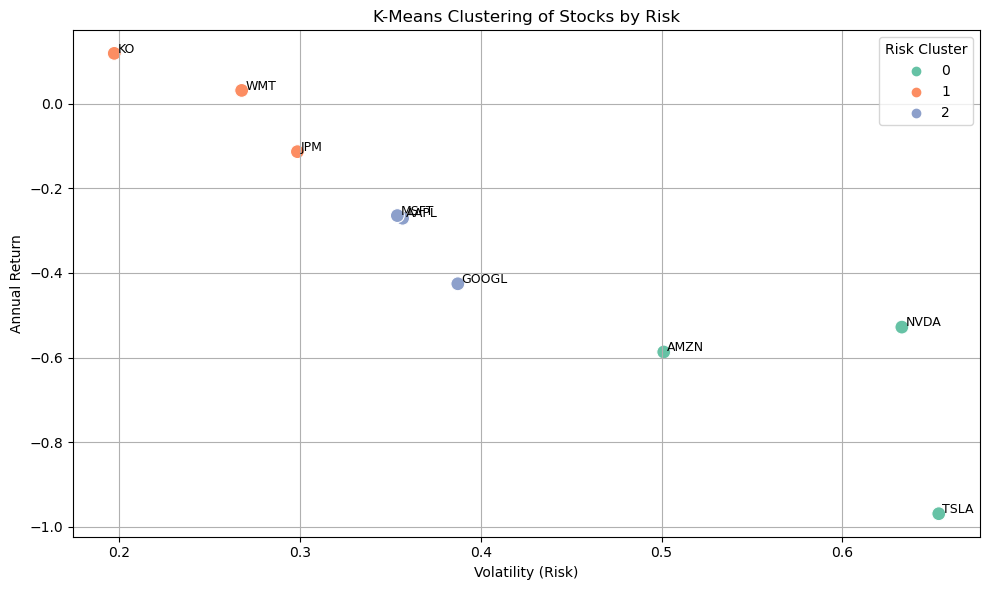

In [48]:
#Import libraries

import pandas as pd
import numpy as np
import yfinance as yf #To get historic stock prices
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define stock tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'JPM', 'KO', 'WMT', 'NVDA']

# Step 2: Download price data (using 'Close' prices for reliability)
price_data = pd.DataFrame()
for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(start='2022-01-01', end='2023-01-01')
    price_data[ticker] = hist['Close']

# Step 3: Calculate daily returns
returns = price_data.pct_change().dropna()

# Step 4: Calculate annual return and volatility
annual_returns = returns.mean() * 252
annual_volatility = returns.std() * np.sqrt(252)

# Step 5: Create a DataFrame of metrics
risk_metrics = pd.DataFrame({
    'Annual Return': annual_returns,
    'Volatility': annual_volatility
})

# Step 6: Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(risk_metrics)

# Step 7: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
risk_metrics['Risk Cluster'] = kmeans.fit_predict(scaled_data)

# Step 8: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=risk_metrics, x='Volatility', y='Annual Return',
                hue='Risk Cluster', palette='Set2', s=100)

# Annotate stock tickers
for ticker in risk_metrics.index:
    plt.text(risk_metrics.loc[ticker, 'Volatility'] + 0.002,
             risk_metrics.loc[ticker, 'Annual Return'] + 0.002,
             ticker, fontsize=9)

plt.title('K-Means Clustering of Stocks by Risk')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Annual Return')
plt.grid(True)
plt.tight_layout()
plt.show()
